Este conjunto de datos se puede utilizar para predecir la gravedad (benigna o maligna)
de una masa mamográfica a partir de los atributos BI-RADS y la edad de la paciente. Contiene una evaluación BI-RADS, la edad del paciente y tres atributos BI-RADS junto con la gravedad para 516 casos benignos y 445 masas malignas que se han identificado en mamografías digitales de campo completo recogidos en el Instituto de Radiología de la Universidad Erlangen-Nuremberg entre 2003 y 2006.
Cada instancia tiene una evaluación BI-RADS asociada que varía de 1 (definitivamente benigna)
a 5 (altamente sugestivo de malignidad) asignado en un proceso de doble revisión por
médicos

### Ejercicio

- Generar un conjunto de entrenamiento y uno de prueba
- Entrenar el modelo
- Hacer predicciones sobre el conjunto de prueba
- Evaluar el modelo

¿El modelo logra clasificar correctamente los casos de prueba?
¿Cómo afectaría en la realidad el error de este modelo?


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import numpy as np
from io import StringIO
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

## Obtener datos

In [2]:
df = pd.read_csv('mammogram_dataset.csv')
df.head()

,BI_RADS_assessment,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,-100000,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,-100000,1


### Obtener subconjunto de atributos

In [3]:
data=df.values[:,:5]
data
data_columns = (df.columns.values[:5])
print(data_columns)

['BI_RADS_assessment' 'age' 'shape' 'margin' 'density']


### Obtener subconjunto de clases

In [4]:
target=df.values[:,5]
target
data_rows=list(np.unique(target))
final = map(str, data_rows)
data_rows = list(final)
print(data_rows)

['0', '1']


## Generar un conjunto de entrenamiento y uno de prueba

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=89)

## Entrenar modelo

In [6]:
clf = DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

## Obtener Predicciones

In [7]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0])

## Comprobar las predicciones

Las prediccion son un:  79.23875432525952 % certeras


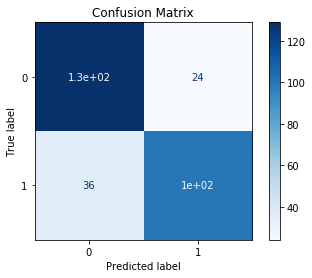

In [8]:
print('Las prediccion son un: ', metrics.accuracy_score(y_test, y_pred)*100, '% certeras')
metrics.confusion_matrix(y_test, y_pred)
disp = metrics.plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.show()

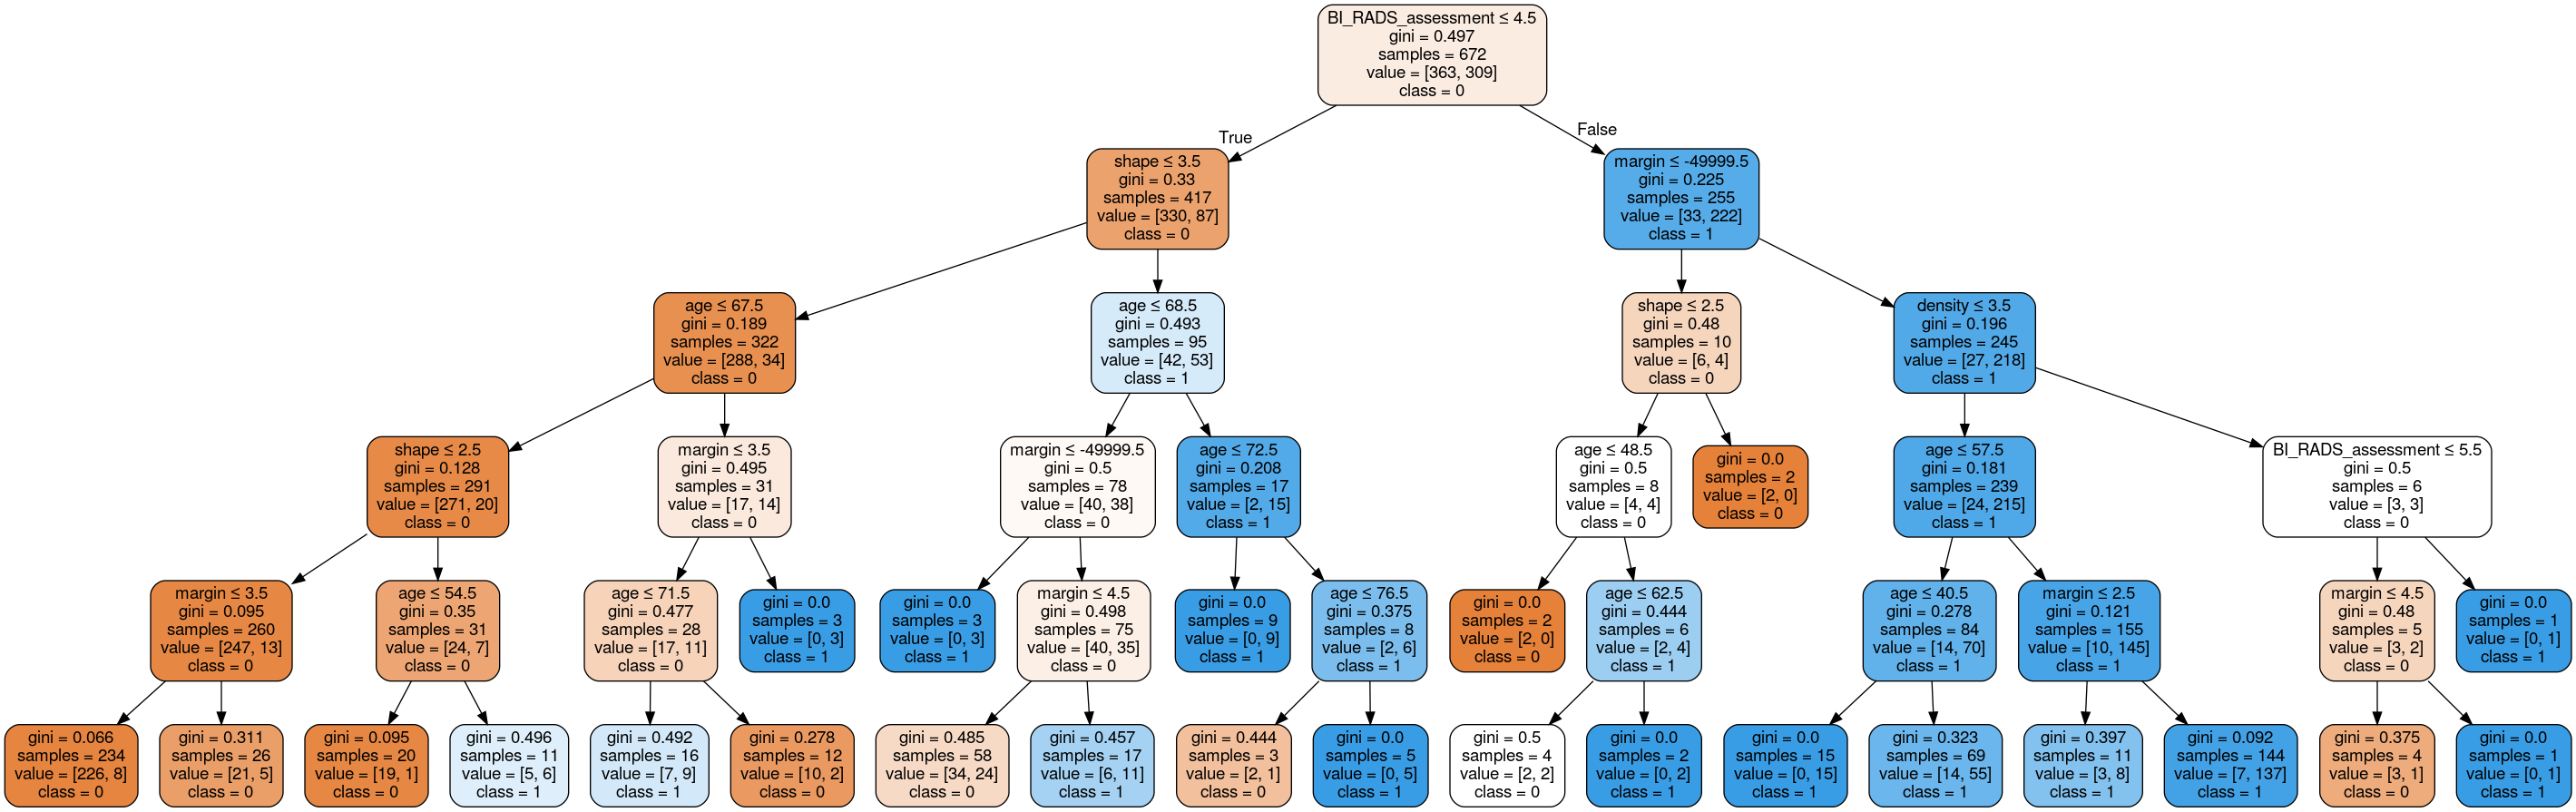

In [9]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_columns,class_names=data_rows)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')
Image(graph.create_png())

# Conclusion Aprendizaje Bayesiano

Teniendo en cuenta los distintos valores a los que se llega cambiando los valores de tamaño de la prueba, se llego a la conclusion de que el sistema no puede asegurar que los resultados sean correctos. (Con un 50 % de certeza en todos los casos es la misma certeza que tirar una moneda)

Con estos resultados, seria peligroso dejarle la decision a una maquina ya que de estos datos dependen las vidas de las personas.

# Conclusión

1) Con arboles de decisión se logra un mucho mejor resultado que con el aprendizaje bayesiano, la certeza pasa de un 50% a valores por encima del 77%. (Dependiendo de la profundidad del árbol de decisión)

2) La profundidad óptima del árbol de decisión es de 3, mas allá de este valor, la certeza comienza a bajar hasta un 77%/76%.

3) No existe una gran diferencia entre el  método por ganancia o por gini, pero gini tiene en promedio, resultados un 1 o 2% mas altos que el método por ganancia.

Al eliminar el factor humano del árbol de decisión (Variable BI_Rads, medida en que al doctor le parece un tumor benigno o maligno) quedo como la variable mas importante el margen. Al usar una profundidad de 5, se logra la mayor certeza para este caso (Un 78% de certeza) por lo que se podría eliminar el factor humano del árbol de decisión y este seguiría logrando buenos resultados.